# Figure S2

All plots in the manuscript are done with DPI = 600. In the jupyter notebook I changed it to *200*


In [24]:

from scipy.integrate import odeint, solve_ivp, lsoda
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



import scipy.optimize
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tkr
import scipy.stats as st
from scipy.stats import scoreatpercentile

from scipy.integrate import odeint, solve_ivp, lsoda
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from lmfit import Parameters, minimize, Model, report_fit, conf_interval
from sklearn.metrics import mean_squared_error

import glob

def significance_stars(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'ns'


# Asthetics

In [2]:
colors = [  "#56B4E9", "#009E73", "#CC79A7", "#999999", "#E69F00","#DB2B39", "#0076A1", "#0072B2", "#1A5042","#0C1713", "#6A6969"]
palette = sns.color_palette(colors)
n = 1

sns.set_theme(context='notebook', style='ticks', font='Arial', 
              font_scale=1.3, 
              rc={"lines.linewidth": n, 'axes.linewidth':n, 
                                  "xtick.major.width":n,"ytick.major.width":n}, 
              palette = palette)
sns.color_palette(colors)

[(0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.6, 0.6, 0.6),
 (0.9019607843137255, 0.6235294117647059, 0.0),
 (0.8588235294117647, 0.16862745098039217, 0.2235294117647059),
 (0.0, 0.4627450980392157, 0.6313725490196078),
 (0.0, 0.4470588235294118, 0.6980392156862745),
 (0.10196078431372549, 0.3137254901960784, 0.25882352941176473),
 (0.047058823529411764, 0.09019607843137255, 0.07450980392156863),
 (0.41568627450980394, 0.4117647058823529, 0.4117647058823529)]

# Data

In [23]:
a = pd.read_csv("FigureS2.csv")


In [18]:
df1 = a.query("Seed_mM == 0")
df2 = a.query("Seed_mM == 0.2")
df3 = a.query("Seed_mM == 0.5")


In [19]:
def sigmoid(x, x0, k, a, b):
    y = (a-b) / (1 + np.exp(-k*(x-x0)))
    return y
def fit_sigmoid(df, p0):
    i = df[['time','T']].dropna(how = "any").reset_index(drop = True)
    popt, pcov = curve_fit(sigmoid, 
                           i['time'].values,
                           i['T'].values,method='lm',
                           p0 = p0)
    t50 = popt[0]
    ks = 1/popt[1]
    lag = t50 - 2*ks

    results_fit = t50, ks, lag

    xfit = np.linspace(0, i['time'].max(), 1000)
    yfit = sigmoid(xfit, *popt)
    df_fit = pd.DataFrame({'xfit': xfit, 'yfit':yfit})
    return results_fit, df_fit


In [20]:
f1 = fit_sigmoid(df1, p0 = (.1, 0,1,0))
f2 = fit_sigmoid(df2, p0 = (.1, 0,1,0))
f3 = fit_sigmoid(df3, p0 = (.1, 0,1,0))

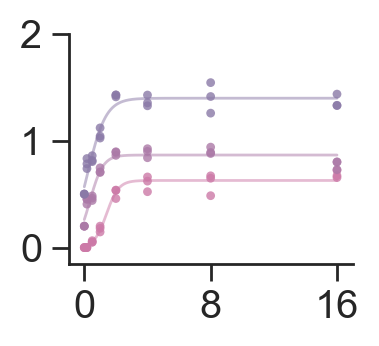

In [22]:
d = [df1, df2, df3]


fig, ax = plt.subplots(figsize = (2.15,2), dpi = 200)

i = 10
sns.scatterplot(data=d[0], x="time", y="T", ax=ax, color="C2", s=i, alpha=0.8, edgecolor="none")
ax.plot(f1[1]["xfit"], f1[1]["yfit"], c = "C2", alpha = 0.5)

sns.scatterplot(data=d[1], x="time", y="T", ax=ax, color="#AB79A7", s=i, alpha=0.8, edgecolor="none")
ax.plot(f2[1]["xfit"], f2[1]["yfit"], c = "#AB79A7", alpha = 0.5)

sns.scatterplot(data=d[2], x="time", y="T", ax=ax, color="#8A79A7", s=i, alpha=0.8, edgecolor="none")
ax.plot(f3[1]["xfit"], f3[1]["yfit"], c = "#8A79A7", alpha = 0.5)

ax.set(xlabel = "", ylabel = "", 
        xticks = np.linspace(0, 16, 3),xlim =  (-1, 17), 
        yticks = np.linspace(0, 2, 3), ylim = (-.15, 2.))


sns.despine(fig, top=True, right=True)
plt.tight_layout()